In [46]:
import numpy as np
import os
import sys
import fnmatch
from astropy.io import fits
from astropy.table import Table, Column, MaskedColumn,unique
from astropy.io import ascii
from astropy.table import QTable,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline
import glob

plt.rcParams['figure.figsize'] = (10,8)
plt.rc('axes', labelsize = 18)
plt.rc('axes', titlesize = 19)
#pl.rc('axes', titleweight = 'bold')
plt.rc('axes', lw = 1)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3

In [47]:
def beta_func_quad(N_spx,a,b):
    return 1 + a*(np.log10(N_spx))**b

In [48]:
def _get_beta_muse(wv_lim, S_N, N_spx):
    
    beta_dir = '/Users/erickaguirre/Desktop/beta_tables/'

    beta_file = glob.glob(beta_dir+'*'+ str(wv_lim[0])+'_'+ str(wv_lim[1]) + '*.dat')
    beta_table = ascii.read(beta_file[0])
    a,b = beta_table['param_fit_a'][0],beta_table['param_fit_b'][0]
    
    print('Using wavelength segment: {}-{}'.format(wv_lim[0],wv_lim[1]))
    print('S/N: {}, N_spx: {}'.format(S_N,N_spx))
    print('------------------'.format(S_N,N_spx))
    
    SNR_ranges = np.array([[0,50],[50,75],[75,100]])
    N_spx_ranges = np.array([3,9,25])
    
    for S_N_range in SNR_ranges:
        if (S_N >  S_N_range[0]) & (S_N <  S_N_range[1]):
            col_name = 'S_N_'+str(S_N_range[0])+'-'+str(S_N_range[1])
            beta_col = beta_table[col_name]
            
            print('using beta table for S/N Range: {}-{}'.format(S_N_range[0],S_N_range[1]))
            
            if N_spx in N_spx_ranges:
                
                col_row = np.argwhere(N_spx_ranges == N_spx)
                print('  using column row {} for N_spx: {}'.format(col_row[0][0],N_spx))
                beta = beta_col[col_row][0][0]
                
                if beta == -999:
                    print('    using Sarzi relation because beta = -999')
                    print(beta_func_quad(N_spx,a,b),'\n')
                    return beta_func_quad(N_spx,a,b)
                    
                else: 
                    print('    using beta value:{:.4f}\n'.format(beta))
                    return beta

            else:
                print(' using Sarzi relation for N_spx: {}'.format(N_spx))
                print(beta_func_quad(N_spx,a,b),'\n')
                return beta_func_quad(N_spx,a,b)

    # if it goes through the entire forloop without returning something use sarzi relationship
    print('using Sarzi relation for S/N: {}'.format(S_N))
    print(beta_func_quad(N_spx,a,b),'\n')
    return beta_func_quad(N_spx,a,b)

In [5]:
wv_lims = [[4751.42,5212],[5212,5672],[5672,6132],[6132,6592],
           [6592,7052],[7052,7513],[7513,7973],[7973,8433],[8433,8893],[8893,9353.44]]

wv_lim = wv_lims[0]
beta_dir = '/Users/erickaguirre/Desktop/beta_tables/'

beta_file = glob.glob(beta_dir+'*'+ str(wv_lim[0])+'_'+ str(wv_lim[1]) + '*.dat')
beta_table = ascii.read(beta_file[0])
a,b = beta_table['param_fit_a'][0],beta_table['param_fit_b'][0]

N_arr = [3,3,6,9,9,4,25,25,6,9,3]
S_N_arr = [22,70,80,120,5,35,368,88,113,55,32,78]

SNR_ranges = np.array([[0,50],[50,75],[75,100]])
N_spx_ranges = np.array([3,9,25])

for S_N,N_spx in zip(S_N_arr,N_arr):
    _get_beta_muse(wv_lim, S_N, N_spx)

Using wavelength segment: 4751.42-5212
S/N: 22, N_spx: 3
------------------
using beta table for S/N Range: 0-50
  using column row 0 for N_spx: 3
    using beta value:1.3891

Using wavelength segment: 4751.42-5212
S/N: 70, N_spx: 3
------------------
using beta table for S/N Range: 50-75
  using column row 0 for N_spx: 3
    using Sarzi relation because beta = -999
1.3483341478965092 

Using wavelength segment: 4751.42-5212
S/N: 80, N_spx: 6
------------------
using beta table for S/N Range: 75-100
 using Sarzi relation for N_spx: 6
1.4326545659655456 

Using wavelength segment: 4751.42-5212
S/N: 120, N_spx: 9
------------------
using Sarzi relation for S/N: 120
1.4735915561392252 

Using wavelength segment: 4751.42-5212
S/N: 5, N_spx: 9
------------------
using beta table for S/N Range: 0-50
  using column row 1 for N_spx: 9
    using beta value:1.4328

Using wavelength segment: 4751.42-5212
S/N: 35, N_spx: 4
------------------
using beta table for S/N Range: 0-50
 using Sarzi relati

In [49]:
# # directory path for NGC 4030 and NGC 1042
# path = '/Users/erickaguirre/mangadap/examples/'

# bin_dir = 'output2.0_'
# test_name1 = 'test'
# test_name2 = 'test_err_corr'
# test_sub_dir = '/SQUARE2.0-MILESHC-MASTARSSP/100000/1/'


# # For continuum-normalization around NaI
# # wavelength continuum fitting range outside of NaI region
# blim = [5850.0,5870.0]
# rlim = [5910.0,5930.0]
# # wavelength fitting range inside of NaI region
# fitlim = [5880.0,5910.0]
# # speed of light in km/s
# c = 2.998e5
# # Na I doublet vacuum absorption wavelengths 
# D1 = 5891.582 # in angstroms
# D2 = 5897.558 # in angstroms
# redshift = 0.00489 

# # log cube model and data file path
# log_cube_file1 = path + bin_dir + test_name1 + test_sub_dir + 'manga-100000-1-LOGCUBE-SQUARE2.0-MILESHC-MASTARSSP.fits'
# log_cube_file2 = path + bin_dir + test_name2 + test_sub_dir + 'manga-100000-1-LOGCUBE-SQUARE2.0-MILESHC-MASTARSSP.fits'
log_cube_file1 = '/Users/erickaguirre/mangadap/examples/output0.6_test/' + \
                   'SQUARE0.6-MILESHC-MASTARSSP/100000/1/' + \
                   'manga-100000-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARSSP.fits'

log_cube_file2 = '/Users/erickaguirre/mangadap/examples/output0.6_test_err_corr/' + \
                   'SQUARE0.6-MILESHC-MASTARSSP/100000/1/' + \
                   'manga-100000-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARSSP.fits'

log_cube1 = fits.open(log_cube_file1) 
#log_cube_fil = path + bin_dir + gal_name + gal_sub_dir + 'manga-1-2-LOGCUBE-SQUARE2.0-MILESHC-MASTARSSP.fits'
log_cube1 = fits.open(log_cube_file1)
log_cube2 = fits.open(log_cube_file2)

# # log maps file path
# log_maps_file1 = path + bin_dir + test_name1 + test_sub_dir + 'manga-1-1-MAPS-SQUARE2.0-MILESHC-MASTARSSP.fits.gz'
# log_maps_file2 = path + bin_dir + test_name2 + test_sub_dir + 'manga-1-1-MAPS-SQUARE2.0-MILESHC-MASTARSSP.fits.gz'

#log_maps_fil = path + bin_dir + gal_name + gal_sub_dir + 'manga-1-2-MAPS-SQUARE2.0-MILESHC-MASTARSSP.fits.gz'

log_maps_file1 = '/Users/erickaguirre/mangadap/examples/output0.6_test/' + \
                   'SQUARE0.6-MILESHC-MASTARSSP/100000/1/' + \
                   'manga-100000-1-MAPS-SQUARE0.6-MILESHC-MASTARSSP.fits'

log_maps_file2 = '/Users/erickaguirre/mangadap/examples/output0.6_test_err_corr/' + \
                   'SQUARE0.6-MILESHC-MASTARSSP/100000/1/' + \
                   'manga-100000-1-MAPS-SQUARE0.6-MILESHC-MASTARSSP.fits'
# log maps file 
hdu_map1 = fits.open(log_maps_file1)
hdu_map2 = fits.open(log_maps_file2)

# bin ID has multiple layers of the same bin id map so use first one
binid_map1 = hdu_map1['BINID'].data[0]
binid_map2 = hdu_map2['BINID'].data[0]

# stellar velocity map
ppxf_v_map1 = hdu_map1['STELLAR_VEL'].data
ppxf_v_map2 = hdu_map2['STELLAR_VEL'].data

#SNR map
SNR_map1 = hdu_map1['BIN_SNR'].data
SNR_map2 = hdu_map2['BIN_SNR'].data

# obtain flux array from MUSE cube
spec1 = log_cube1['FLUX'].data
spec2 = log_cube2['FLUX'].data

mod1 = log_cube1['MODEL'].data
mod2 = log_cube2['MODEL'].data

ivar1 = log_cube1['IVAR'].data
ivar2 = log_cube2['IVAR'].data

stell_ivar1 = hdu_map1['STELLAR_VEL_IVAR'].data
stell_ivar2 = hdu_map2['STELLAR_VEL_IVAR'].data

espec1 = np.sqrt(1/ivar1)
espec2 = np.sqrt(1/ivar2)

stell_err1 = np.sqrt(1/stell_ivar1)
stell_err2 = np.sqrt(1/stell_ivar2)

wave1 =log_cube1['WAVE'].data
wave2 =log_cube2['WAVE'].data


/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_9063/1814363097.py:81: RuntimeWarning: divide by zero encountered in divide
  espec1 = np.sqrt(1/ivar1)
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_9063/1814363097.py:82: RuntimeWarning: divide by zero encountered in divide
  espec2 = np.sqrt(1/ivar2)
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_9063/1814363097.py:84: RuntimeWarning: divide by zero encountered in divide
  stell_err1 = np.sqrt(1/stell_ivar1)
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_9063/1814363097.py:85: RuntimeWarning: divide by zero encountered in divide
  stell_err2 = np.sqrt(1/stell_ivar2)


In [50]:
hdu_map2.info()

Filename: /Users/erickaguirre/mangadap/examples/output0.6_test_err_corr/SQUARE0.6-MILESHC-MASTARSSP/100000/1/manga-100000-1-MAPS-SQUARE0.6-MILESHC-MASTARSSP.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1342   ()      
  1  SPX_SKYCOO    1 ImageHDU        43   (30, 30, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        48   (30, 30, 4)   float32   
  3  SPX_MFLUX     1 ImageHDU        36   (30, 30)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        37   (30, 30)   float32   
  5  SPX_SNR       1 ImageHDU        34   (30, 30)   float32   
  6  BINID         1 ImageHDU        45   (30, 30, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        43   (30, 30, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        48   (30, 30, 4)   float32   
  9  BIN_AREA      1 ImageHDU        35   (30, 30)   float32   
 10  BIN_FAREA     1 ImageHDU        34   (30, 30)   float32   
 11  BIN_MFLUX     1 ImageHDU        37   (30, 30)   float32   


(5700.0, 6100.0)

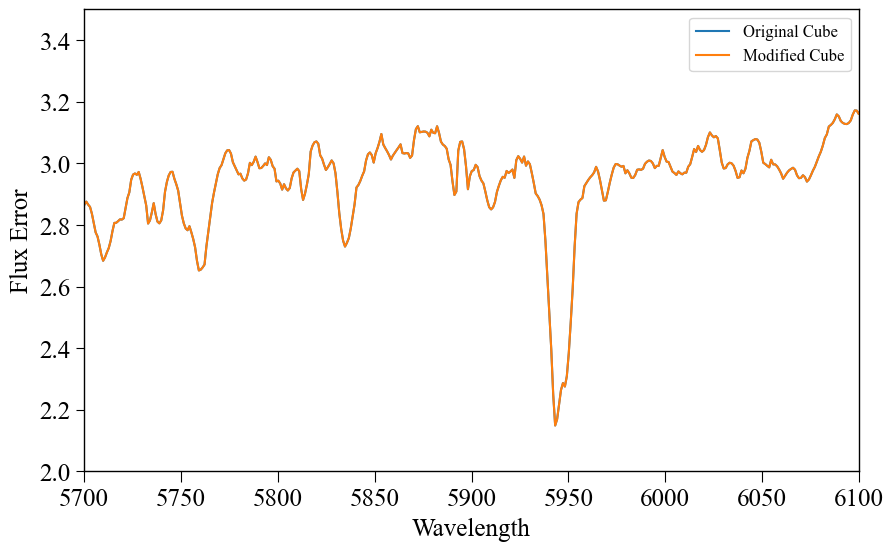

In [8]:
plt.rcParams['figure.figsize'] = (10,6)


plt.plot(wave1,spec1[:,15,15],label='Original Cube')
plt.plot(wave2,spec2[:,15,15],label='Modified Cube')
        

plt.ylabel('Flux Error')
plt.xlabel('Wavelength')
plt.legend(fontsize='large');
plt.ylim(2,3.5)
plt.xlim(5700,6100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


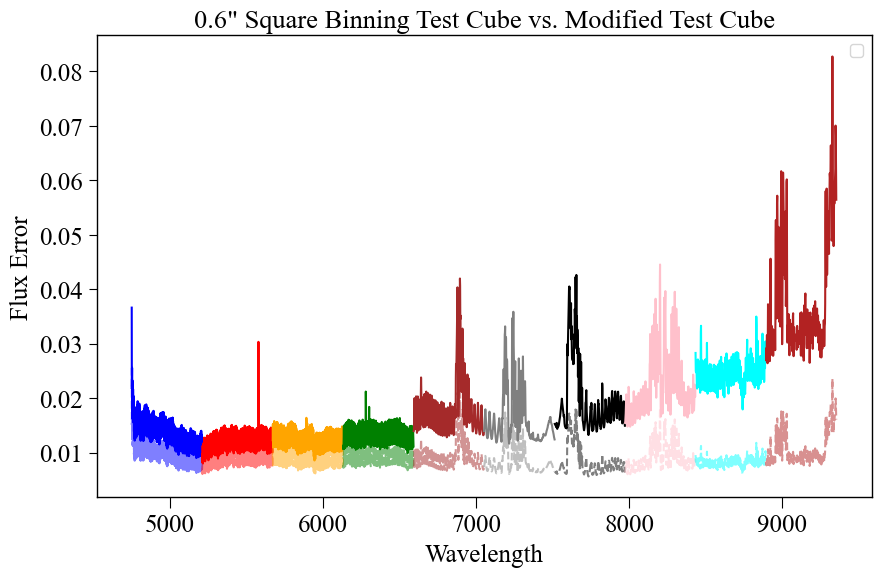

In [9]:
wv_lims = [[4751.42,5212],[5212,5672],[5672,6132],[6132,6592],
           [6592,7052],[7052,7513],[7513,7973],[7973,8433],[8433,8893],[8893,9353.44]]

colors = ['blue','red','orange','green','brown','grey','k','pink','cyan','firebrick']

plt.rcParams['figure.figsize'] = (10,6)
plt.title('0.6" Square Binning Test Cube vs. Modified Test Cube')
for wv_lim,color in zip(wv_lims,colors):
    plt.plot(wave1[(wave1> wv_lim[0])&(wave1< wv_lim[1])],
             espec1[:,15,15][(wave1> wv_lim[0])&(wave1<wv_lim[1])],
             ls='--',c=color,alpha=0.5)
    plt.plot(wave2[(wave2> wv_lim[0])&(wave2< wv_lim[1])],
             espec2[:,15,15][(wave2> wv_lim[0])&(wave2<wv_lim[1])],
             c=color)
    
plt.ylabel('Flux Error')
plt.xlabel('Wavelength')
plt.legend(fontsize='large');
# plt.ylim(1.2,1.8)
#plt.xlim(5700,6100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


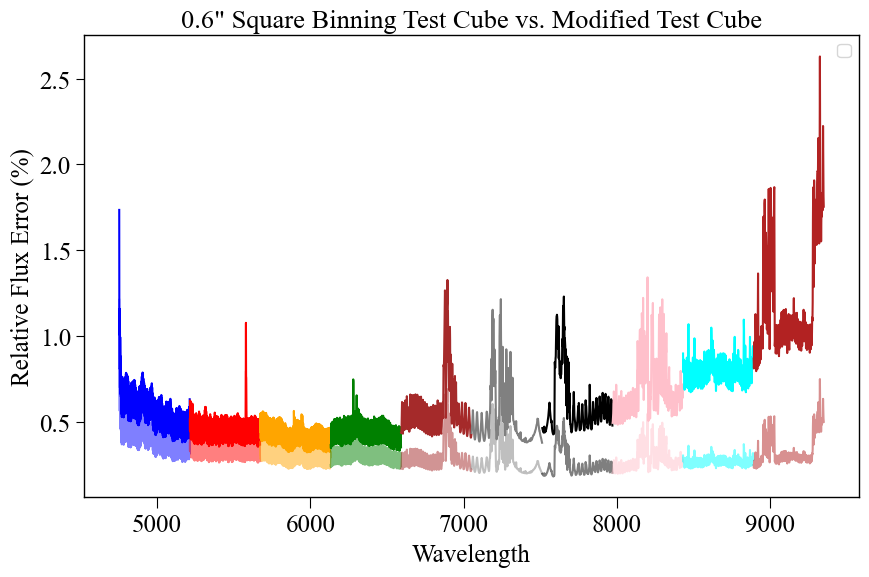

In [10]:
wv_lims = [[4751.42,5212],[5212,5672],[5672,6132],[6132,6592],
           [6592,7052],[7052,7513],[7513,7973],[7973,8433],[8433,8893],[8893,9353.44]]

colors = ['blue','red','orange','green','brown','grey','k','pink','cyan','firebrick']

plt.rcParams['figure.figsize'] = (10,6)
plt.title('0.6" Square Binning Test Cube vs. Modified Test Cube')
for wv_lim,color in zip(wv_lims,colors):
    orig_espec = (espec1[:,15,15][(wave1> wv_lim[0])&(wave1<wv_lim[1])] / \
           spec1[:,15,15][(wave1> wv_lim[0])&(wave1<wv_lim[1])] ) * 100
        
    modif_espec = (espec2[:,15,15][(wave1> wv_lim[0])&(wave1<wv_lim[1])] / \
           spec2[:,15,15][(wave1> wv_lim[0])&(wave1<wv_lim[1])]) * 100
        
    plt.plot(wave1[(wave1> wv_lim[0])&(wave1< wv_lim[1])],
             orig_espec,c=color,alpha=0.5)
    plt.plot(wave2[(wave2> wv_lim[0])&(wave2< wv_lim[1])],
             modif_espec,
             c=color)
    
plt.ylabel('Relative Flux Error (%)')
plt.xlabel('Wavelength')
plt.legend(fontsize='large');
# plt.ylim(1.2,1.8)
#plt.xlim(5700,6100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


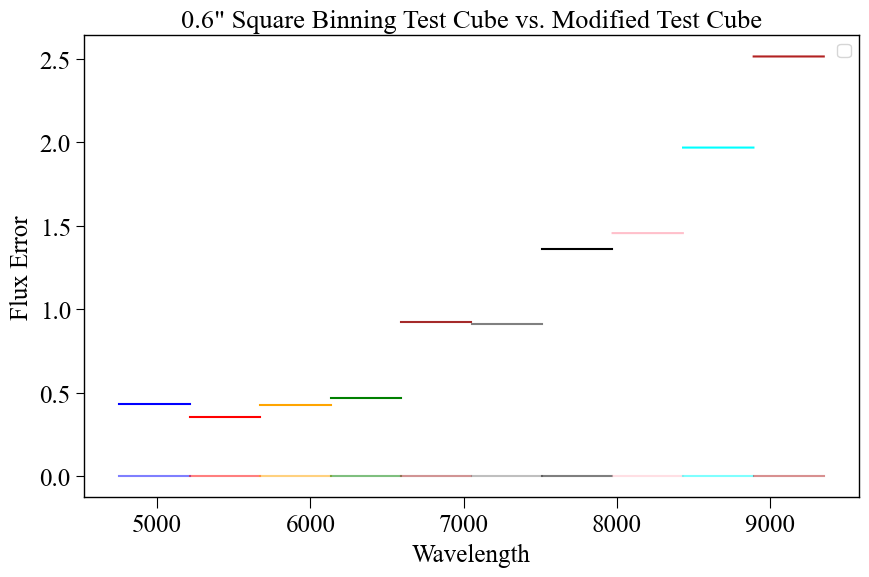

In [11]:
wv_lims = [[4751.42,5212],[5212,5672],[5672,6132],[6132,6592],
           [6592,7052],[7052,7513],[7513,7973],[7973,8433],[8433,8893],[8893,9353.44]]

colors = ['blue','red','orange','green','brown','grey','k','pink','cyan','firebrick']

plt.rcParams['figure.figsize'] = (10,6)
plt.title('0.6" Square Binning Test Cube vs. Modified Test Cube')
for wv_lim,color in zip(wv_lims,colors):
#     orig_espec = espec1[:,5,5][(wave1> wv_lim[0])&(wave1<wv_lim[1])] / \
#            espec1[:,5,5][(wave1> wv_lim[0])&(wave1<wv_lim[1])]
        
    modif_espec = ( abs(espec2[:,5,5][(wave1> wv_lim[0])&(wave1<wv_lim[1])]- \
                      espec1[:,5,5][(wave1> wv_lim[0])&(wave1<wv_lim[1])]) / \
           espec1[:,5,5][(wave1> wv_lim[0])&(wave1<wv_lim[1])] ) 
        
    plt.plot(wave1[(wave1> wv_lim[0])&(wave1< wv_lim[1])],
             np.zeros(len(modif_espec)),c=color,alpha=0.5)
    plt.plot(wave2[(wave2> wv_lim[0])&(wave2< wv_lim[1])],
             modif_espec,
             c=color)
    
plt.ylabel('Flux Error')
plt.xlabel('Wavelength')
plt.legend(fontsize='large');
# plt.ylim(1.2,1.8)
#plt.xlim(5700,6100)

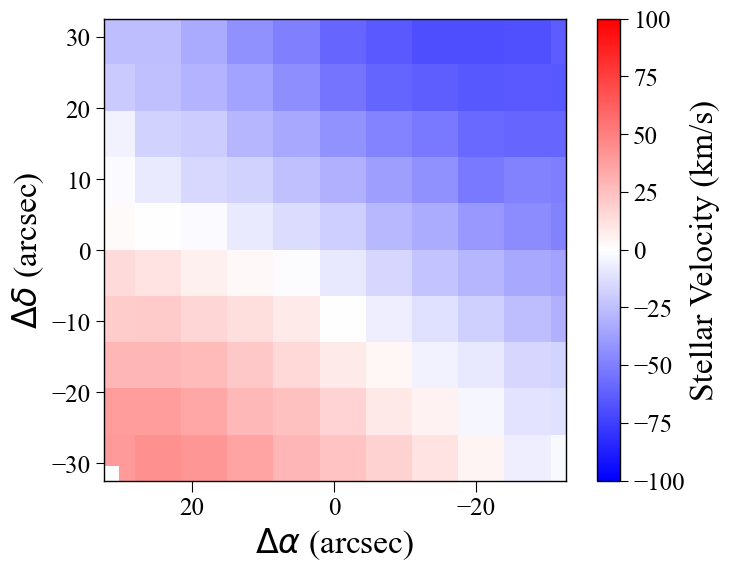

In [12]:
plt.imshow(ppxf_v_map1,origin='lower',cmap='bwr',vmin=-100,vmax=100,
          extent=[32.4, -32.6,-32.4, 32.6])

plt.ylabel(r'$\Delta \delta$ (arcsec)',fontsize=24)
plt.xlabel(r'$\Delta \alpha$ (arcsec)',fontsize=24)
clb = plt.colorbar(fraction=0.046, pad=0.04);
clb.set_label('Stellar Velocity (km/s)',fontsize=24,rotation = 90)
#plt.savefig('/Users/erickaguirre/Desktop/presentation_slides/stellarvel_map.pdf',bbox_inches='tight');

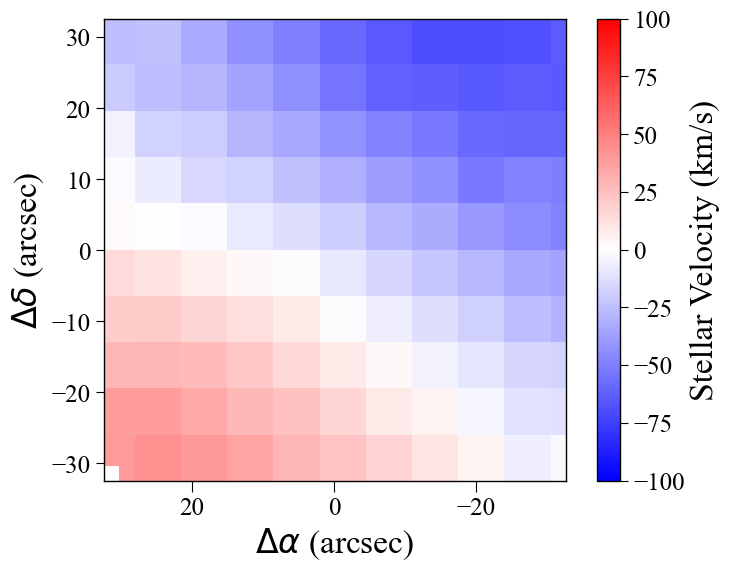

In [13]:
plt.imshow(ppxf_v_map2,origin='lower',cmap='bwr',vmin=-100,vmax=100,
          extent=[32.4, -32.6,-32.4, 32.6])

plt.ylabel(r'$\Delta \delta$ (arcsec)',fontsize=24)
plt.xlabel(r'$\Delta \alpha$ (arcsec)',fontsize=24)
clb = plt.colorbar(fraction=0.046, pad=0.04);
clb.set_label('Stellar Velocity (km/s)',fontsize=24,rotation = 90)

/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_9063/2026075776.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.arange(len(stell_err_flat1)),abs(stell_err_flat1/stell_vel1)*100,alpha=0.6,s=8,label='Original')
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_9063/2026075776.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.arange(len(stell_err_flat2)),abs(stell_err_flat2/stell_vel2)*100,alpha=0.6,s=8,label='Modified')


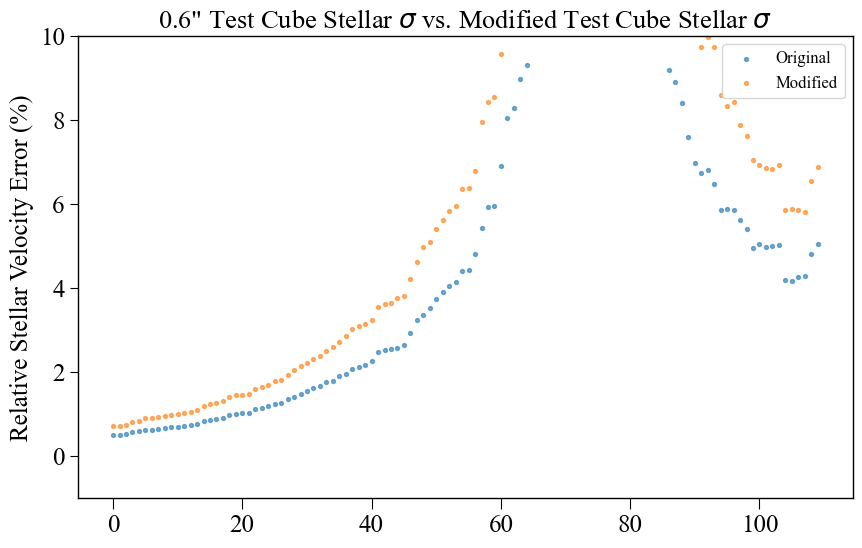

In [29]:
stell_vel1 = np.unique(ppxf_v_map1.ravel())
stell_vel2 = np.unique(ppxf_v_map2.ravel())

stell_err_flat1 = np.unique(stell_err1.ravel())
stell_err_flat2 = np.unique(stell_err2.ravel())

plt.title(r'0.6" Test Cube Stellar $\sigma$ vs. Modified Test Cube Stellar $\sigma$')
#plt.scatter(np.arange(len(stell_err_flat1)),abs(stell_err_flat1-stell_err_flat2),alpha=0.5)
plt.ylabel('Relative Stellar Velocity Error (%)')
plt.scatter(np.arange(len(stell_err_flat1)),abs(stell_err_flat1/stell_vel1)*100,alpha=0.6,s=8,label='Original')
plt.scatter(np.arange(len(stell_err_flat2)),abs(stell_err_flat2/stell_vel2)*100,alpha=0.6,s=8,label='Modified')
plt.ylim(-1,10)
plt.legend(fontsize='large');


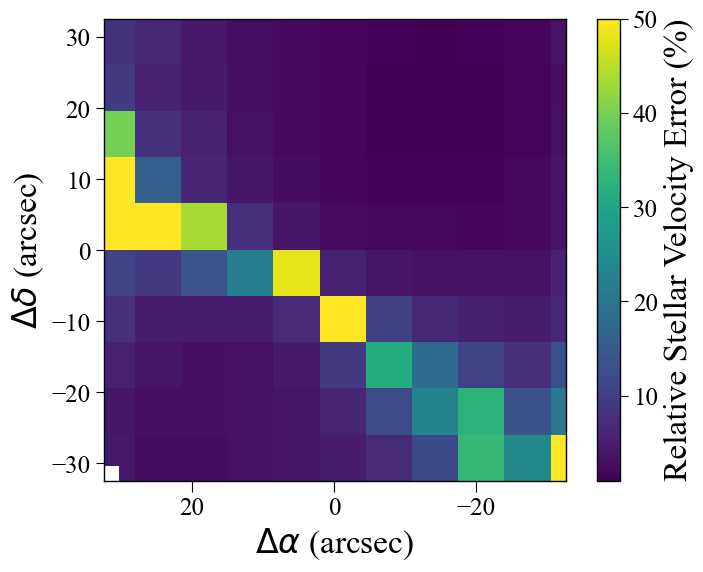

In [45]:
plt.imshow(abs(stell_err2/ppxf_v_map2)*100,origin='lower',cmap='viridis',vmin=1,vmax=50,
           extent=[32.4, -32.6,-32.4, 32.6])

plt.ylabel(r'$\Delta \delta$ (arcsec)',fontsize=24)
plt.xlabel(r'$\Delta \alpha$ (arcsec)',fontsize=24)
clb = plt.colorbar(fraction=0.046, pad=0.04);
clb.set_label('Relative Stellar Velocity Error (%)',fontsize=24,rotation = 90)